# Linear Regression using Scikit-Learn

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from work.lab_utils_common import dlc
np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')

In [2]:
def load_house_data(path):
    with open(path, "r") as file:
        data = file.readlines()
    X_train = []
    y_train = []
    for i in range(len(data)):
        tmp_line = data[i].split(',')
        float_data_line = []
        for j in range(len(tmp_line)):
            float_data = float(tmp_line[j])
            #print(float_data)
            if j!= len(tmp_line)-1 :
                float_data_line.append(float_data)
            else:
                y_train.append(float_data)
        X_train.append(float_data_line)   
        #print(float_data_line, float_data)
    return np.array(X_train), np.array(y_train)

## Gradient Descent
Scikit-learn has a gradient descent regression model  
[sklearn.linear_model.SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#examples-using-sklearn-linear-model-sgdregressor).  Like your previous implementation of gradient descent, this model performs best with normalized inputs.  
[sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) will perform z-score normalization as in a previous lab. Here it is referred to as 'standard score'.

In [3]:
X_train, y_train = load_house_data("work/data/houses.txt")
X_features = ['size(sqft)','bedrooms','floors','age']

Scale/normalize the training data

In [4]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized X:[5.84 6.13 2.06 3.68]


Create and fit the regression model

In [15]:
sgdr = SGDRegressor(max_iter=10000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(max_iter=10000)
number of iterations completed: 122, number of weight updates: 12201.0


View parameters

In [16]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")
print( "model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16")

model parameters:                   w: [110.17 -21.24 -32.39 -37.86], b:[362.25]
model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16


In [17]:

y_pred_sgd = sgdr.predict(X_norm)
y_pred = np.dot(X_norm, w_norm) + b_norm
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")


prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[248.61 295.59 485.77 389.73]
Target values 
[271.5 300.  509.8 394. ]


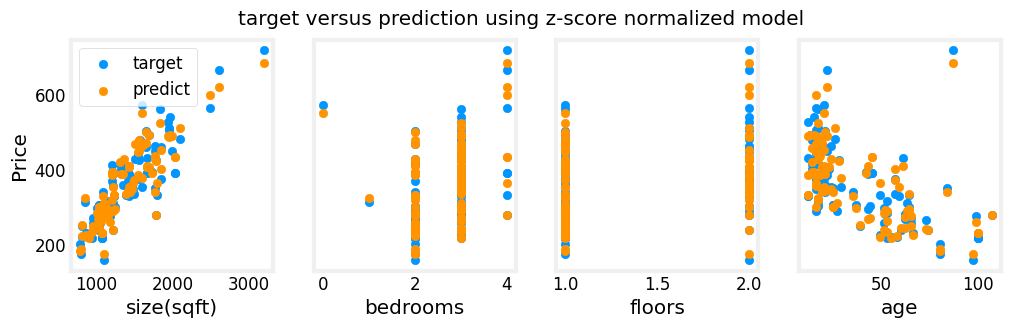

In [18]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred,color=dlc["dlorange"], label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()